In [8]:
import argparse
import os
import museval
import numpy as np
from pathlib import Path
from pathlib import Path
from os import environ as env
import soundfile as sf
import matplotlib.pyplot as plt

In [2]:
# load env variables
%load_ext dotenv
%dotenv -o -v ./config/config_predict.yml
# %reload_ext dotenv

## Load tensorboard logs

In [ ]:
# # Clear any logs from previous runs
# rm -rf ./../data/tensorboard
%load_ext tensorboard
%tensorboard --logdir ./logs/waveunet/

## Calculate SDR, ISR, SIR, SAR metrics from library

In [3]:
label = "mixture.wav_Fe-59.wav"
file_name = f"{str(env['INPUT'])}mixture-23/{label}"
data, samplerate = sf.read(file_name)
target_sources = data

label = "Fe-59.wav"
file_name = f"{str(env['INPUT'])}mixture-23/{label}"
data, samplerate = sf.read(file_name)
estimated_sources = data

In [4]:
SDR, ISR, SIR, SAR, _ = museval.metrics.bss_eval(target_sources, estimated_sources)
SDR

array([[-2.0367487]])

### Assess quality of training Fe-59 + other

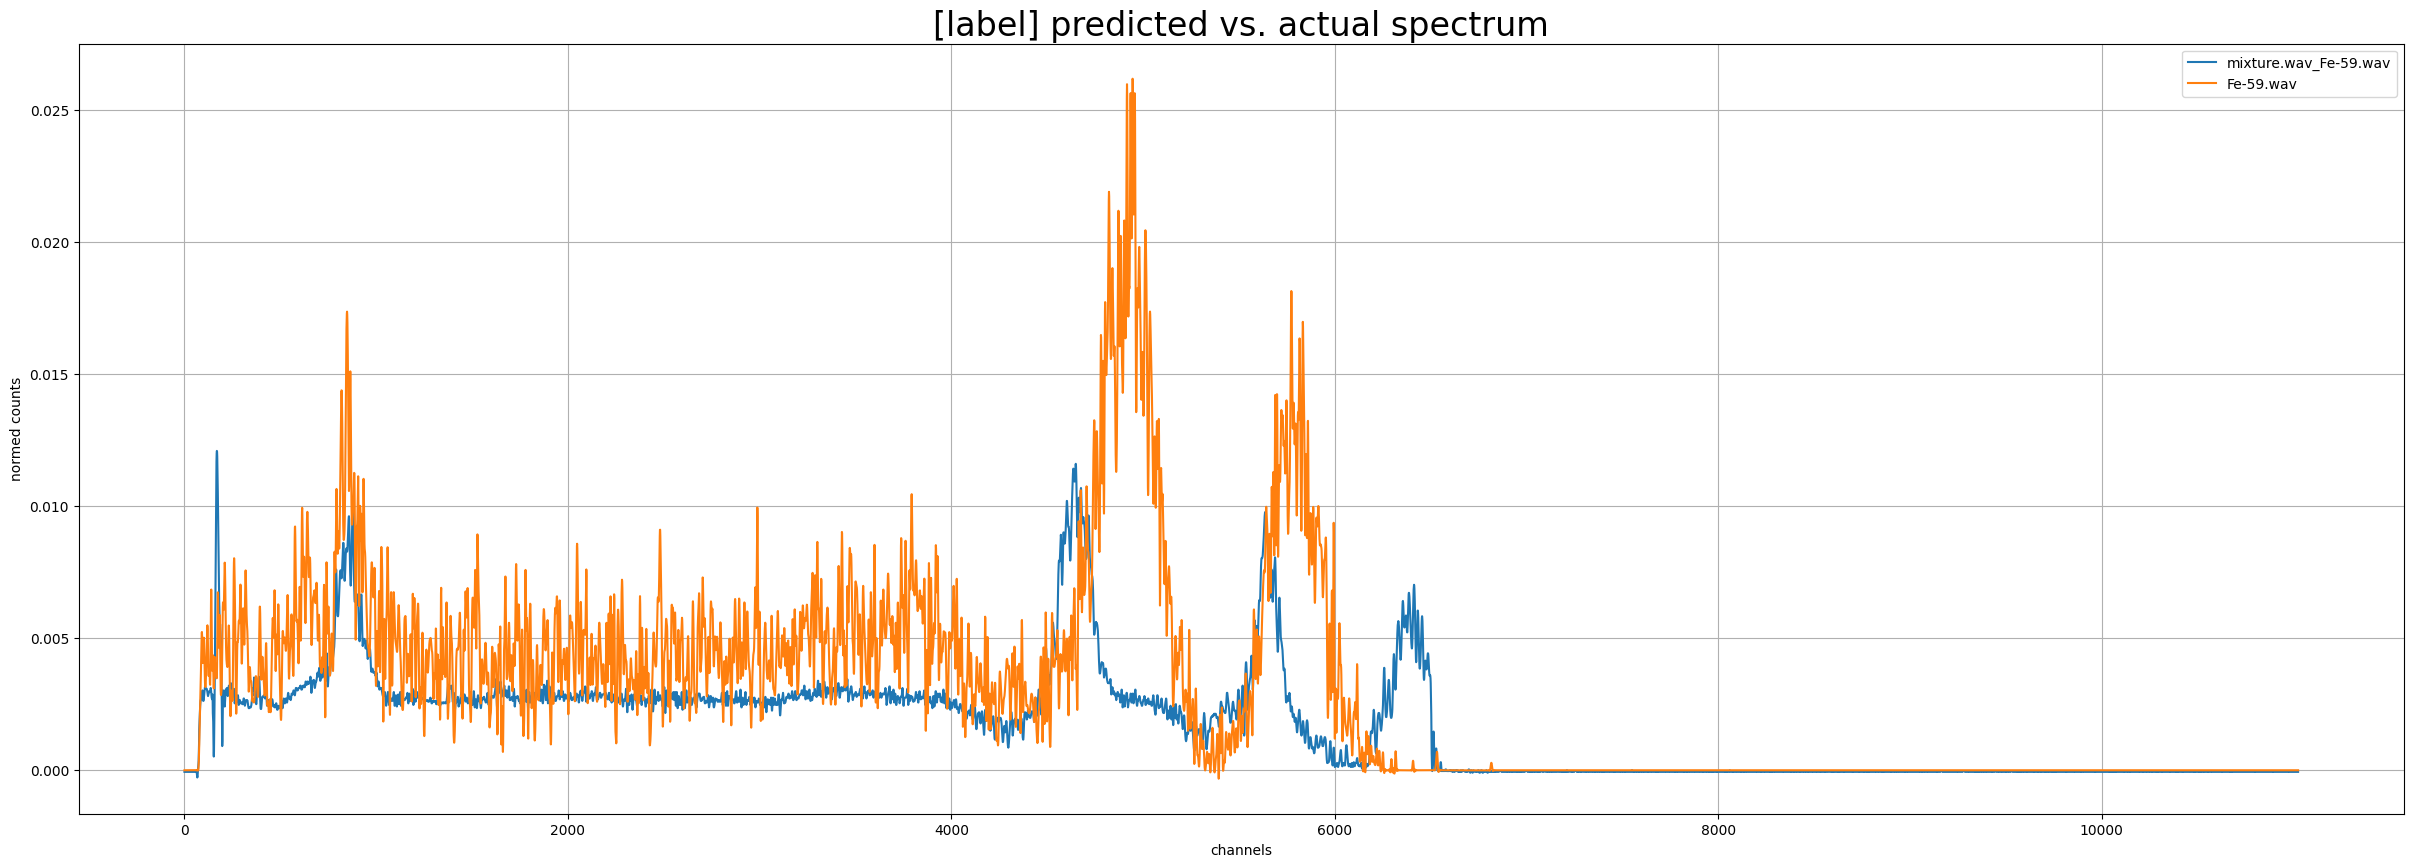

In [5]:
labels = ["mixture.wav_Fe-59.wav", "Fe-59.wav"]

fig, (ax) = plt.subplots(nrows=1, figsize=(30, 10))
for label in labels:
    file_name = f"{str(env['INPUT'])}mixture-23/{label}"
    data, samplerate = sf.read(file_name)
    ax.plot(data, label=f"{label}")

ax.set_title(f"[label] predicted vs. actual spectrum", size =24)
ax.set_xlabel('channels')
ax.set_ylabel('normed counts')
ax.grid(True)
ax.legend()
plt.show()

In [19]:
SDR,_,_,_,_, = museval.metrics.bss_eval(reference, estimate)
SDR[0][0]

7.375184967062349

ValueError: x and y can be no greater than 2D, but have shapes (63,) and (63, 5, 1, 1)

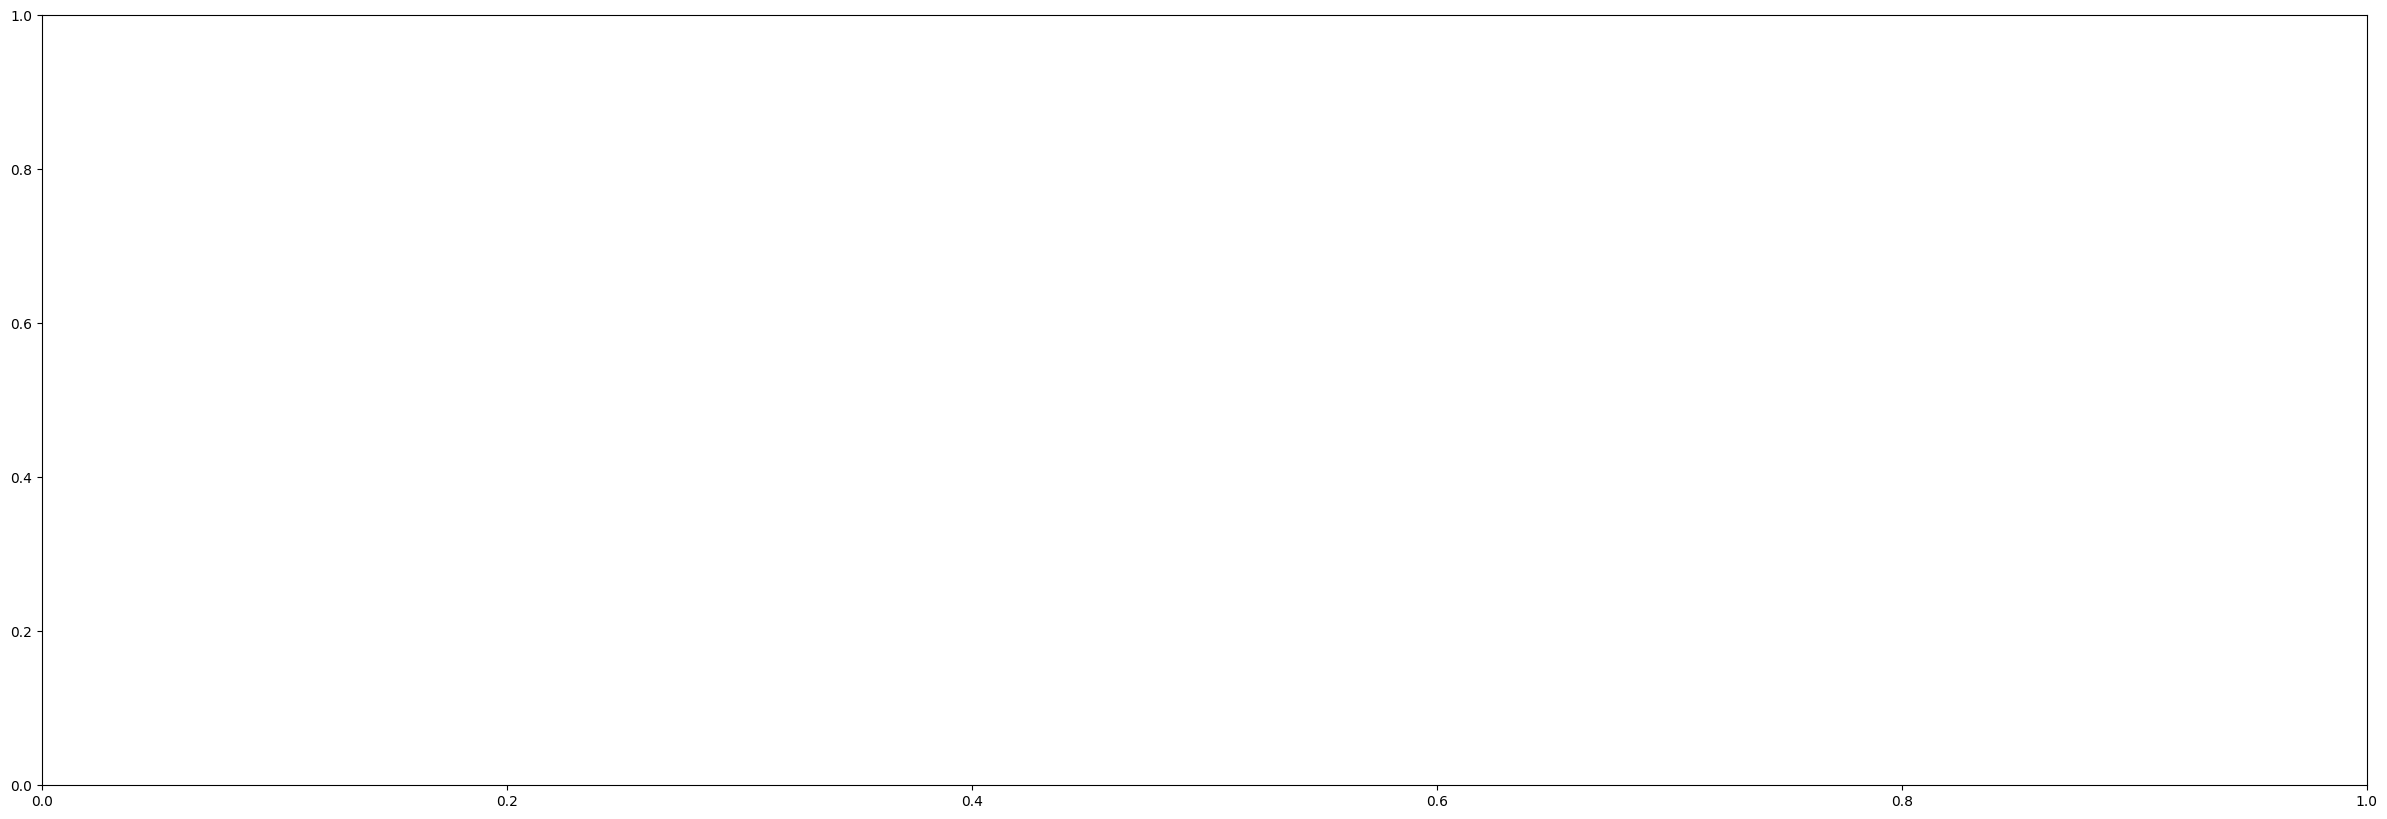

In [13]:
fig, (ax) = plt.subplots(nrows=1, figsize=(30, 10), sharex=True)
ax.plot(sdrs)
ax.set_title(f"Fe-59 SDR metrics on test", size =24)
ax.grid(True)
plt.show()

/home/aarbuzov/work-and-study/git/Wave-U-Net-Pytorch/audio_examples/musdb18hq_geant4_2_classes_Fe59_test_n=629/mixture-1/mixture.wav_Fe-59.wav


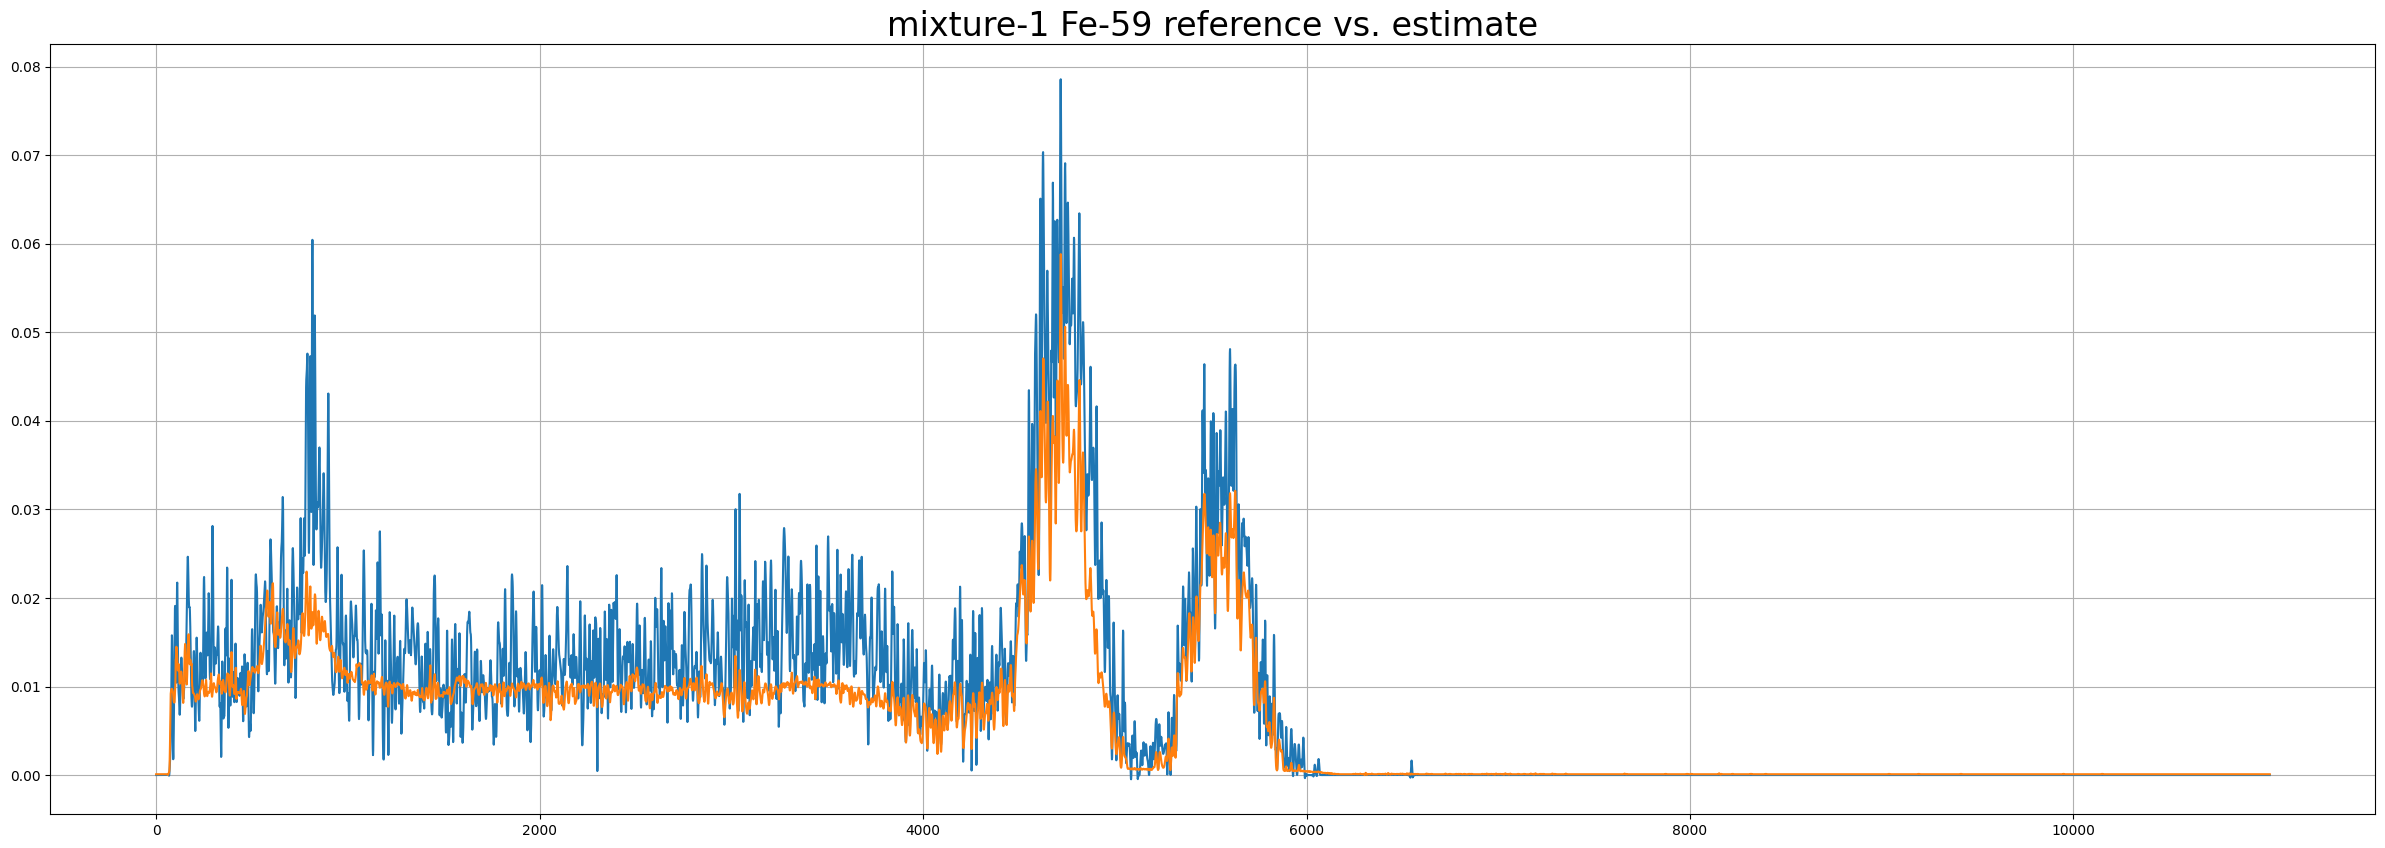

/home/aarbuzov/work-and-study/git/Wave-U-Net-Pytorch/audio_examples/musdb18hq_geant4_2_classes_Fe59_test_n=629/mixture-10/mixture.wav_Fe-59.wav


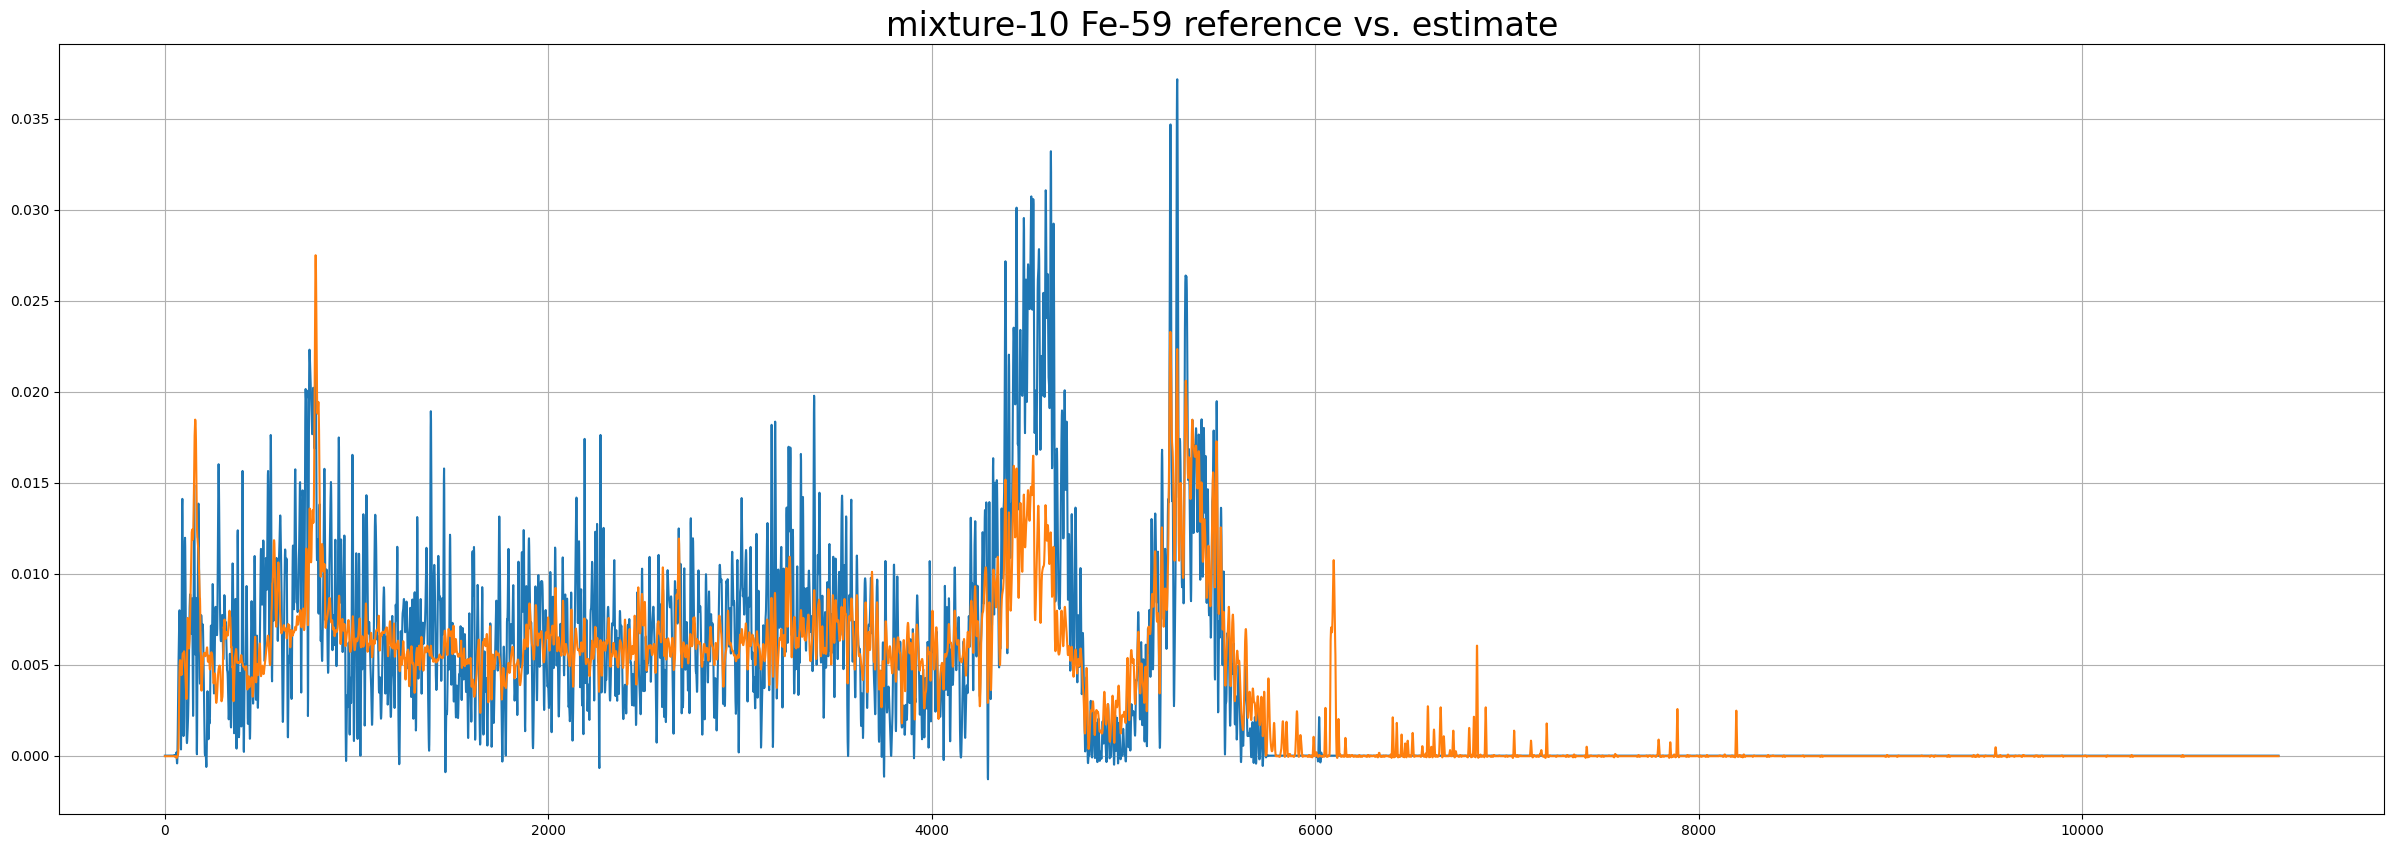

/home/aarbuzov/work-and-study/git/Wave-U-Net-Pytorch/audio_examples/musdb18hq_geant4_2_classes_Fe59_test_n=629/mixture-11/mixture.wav_Fe-59.wav


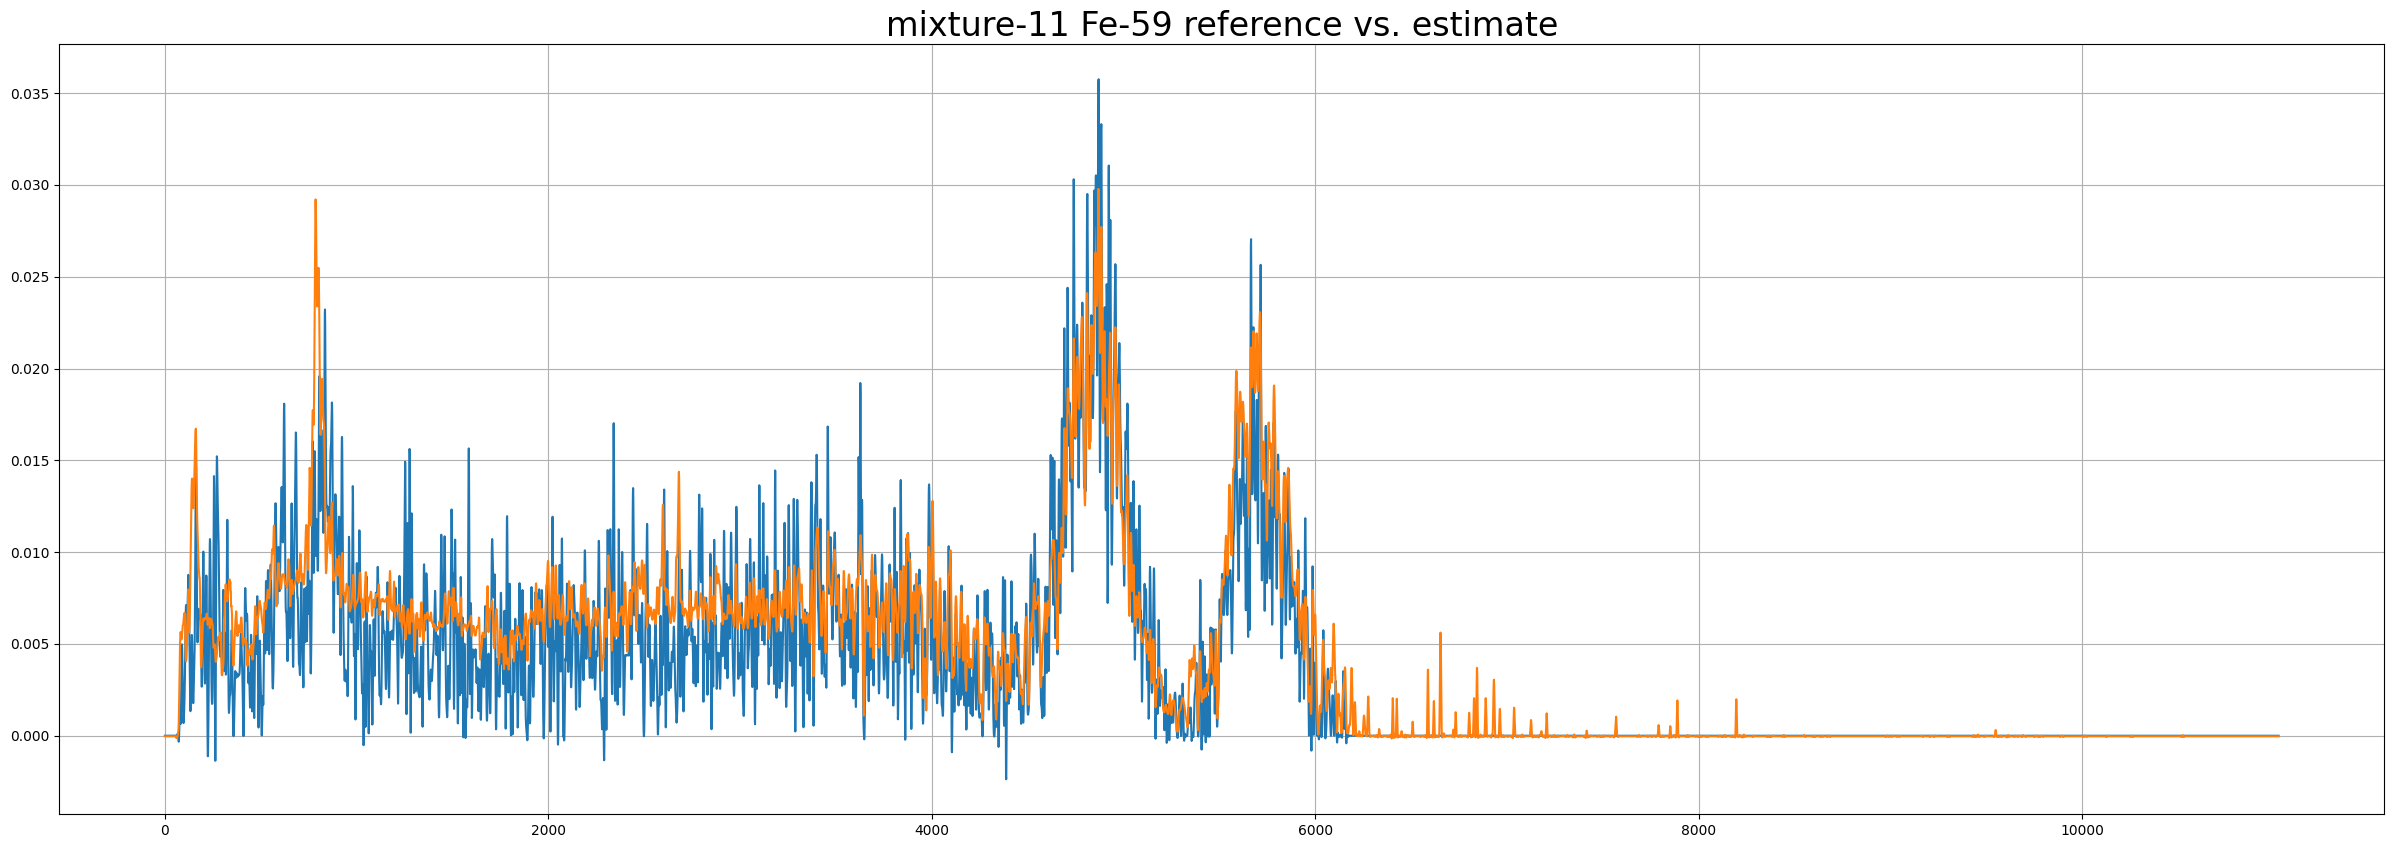

/home/aarbuzov/work-and-study/git/Wave-U-Net-Pytorch/audio_examples/musdb18hq_geant4_2_classes_Fe59_test_n=629/mixture-12/mixture.wav_Fe-59.wav


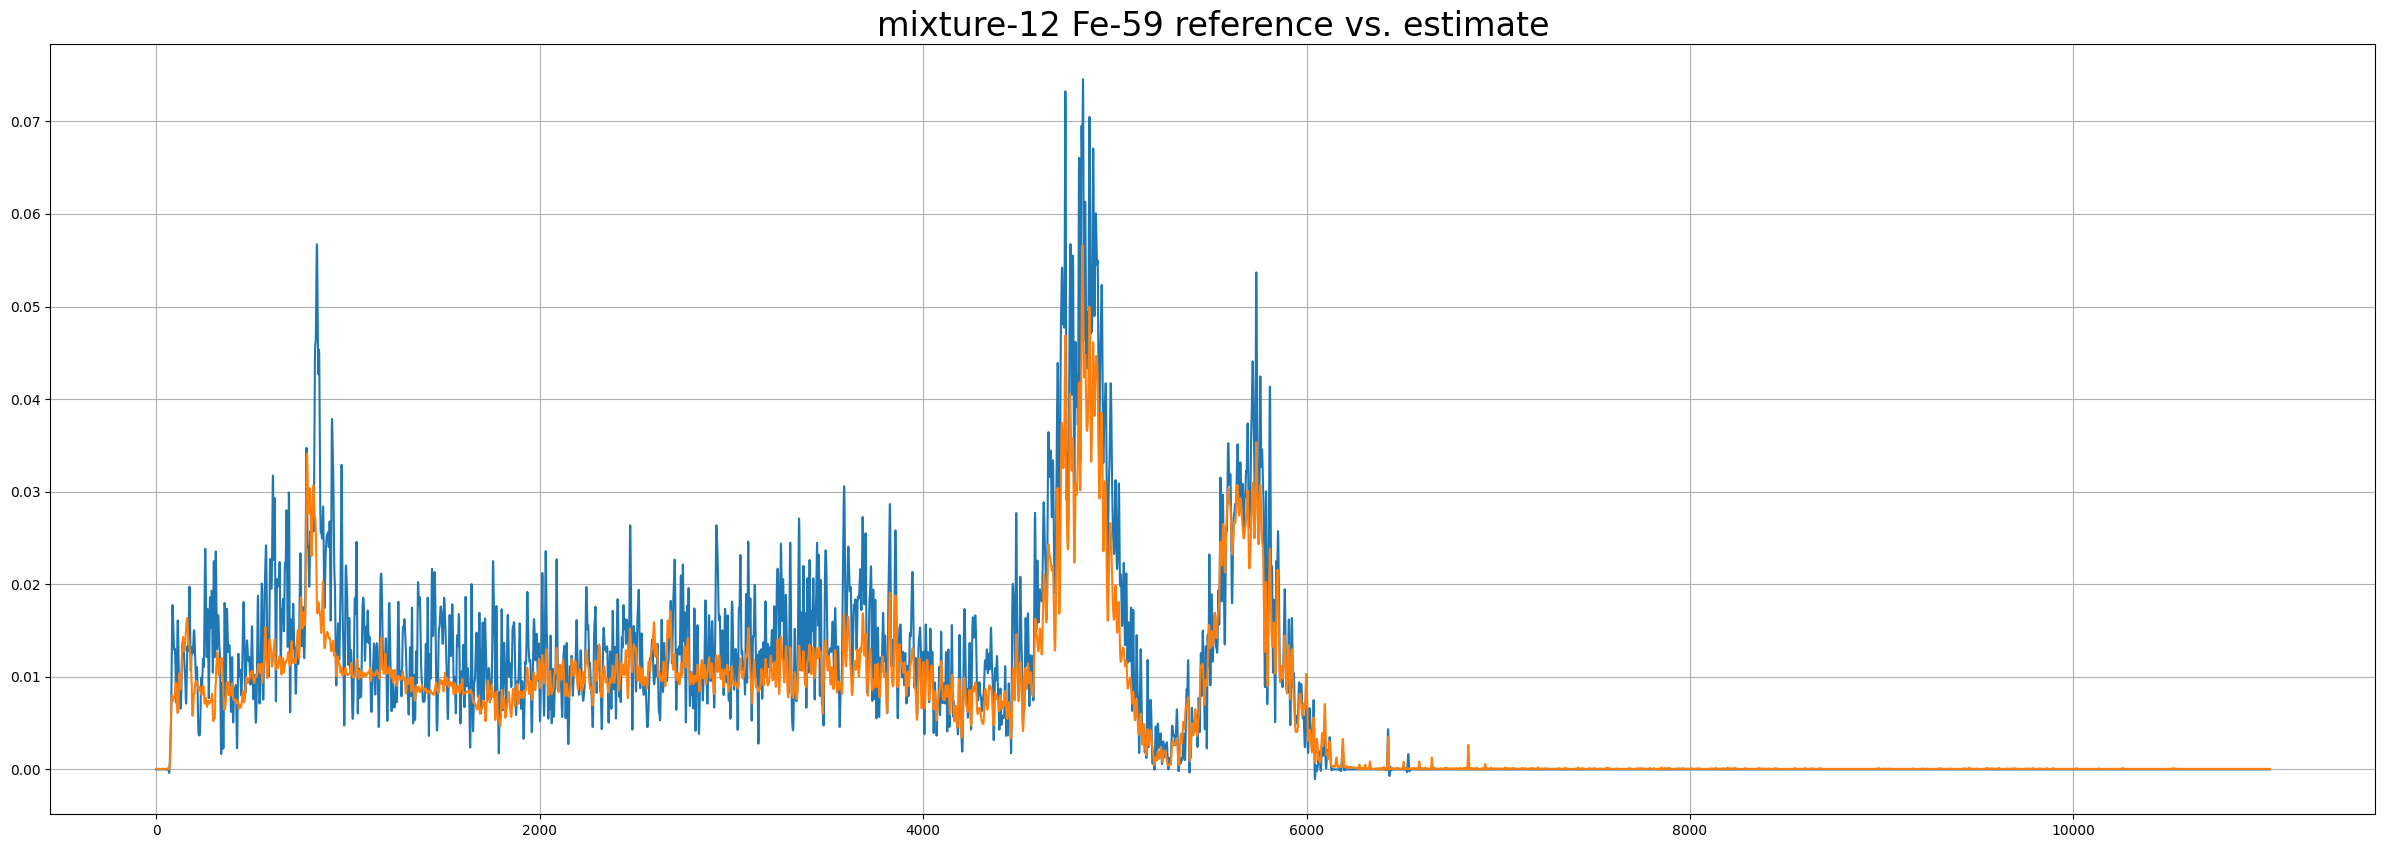

/home/aarbuzov/work-and-study/git/Wave-U-Net-Pytorch/audio_examples/musdb18hq_geant4_2_classes_Fe59_test_n=629/mixture-13/mixture.wav_Fe-59.wav


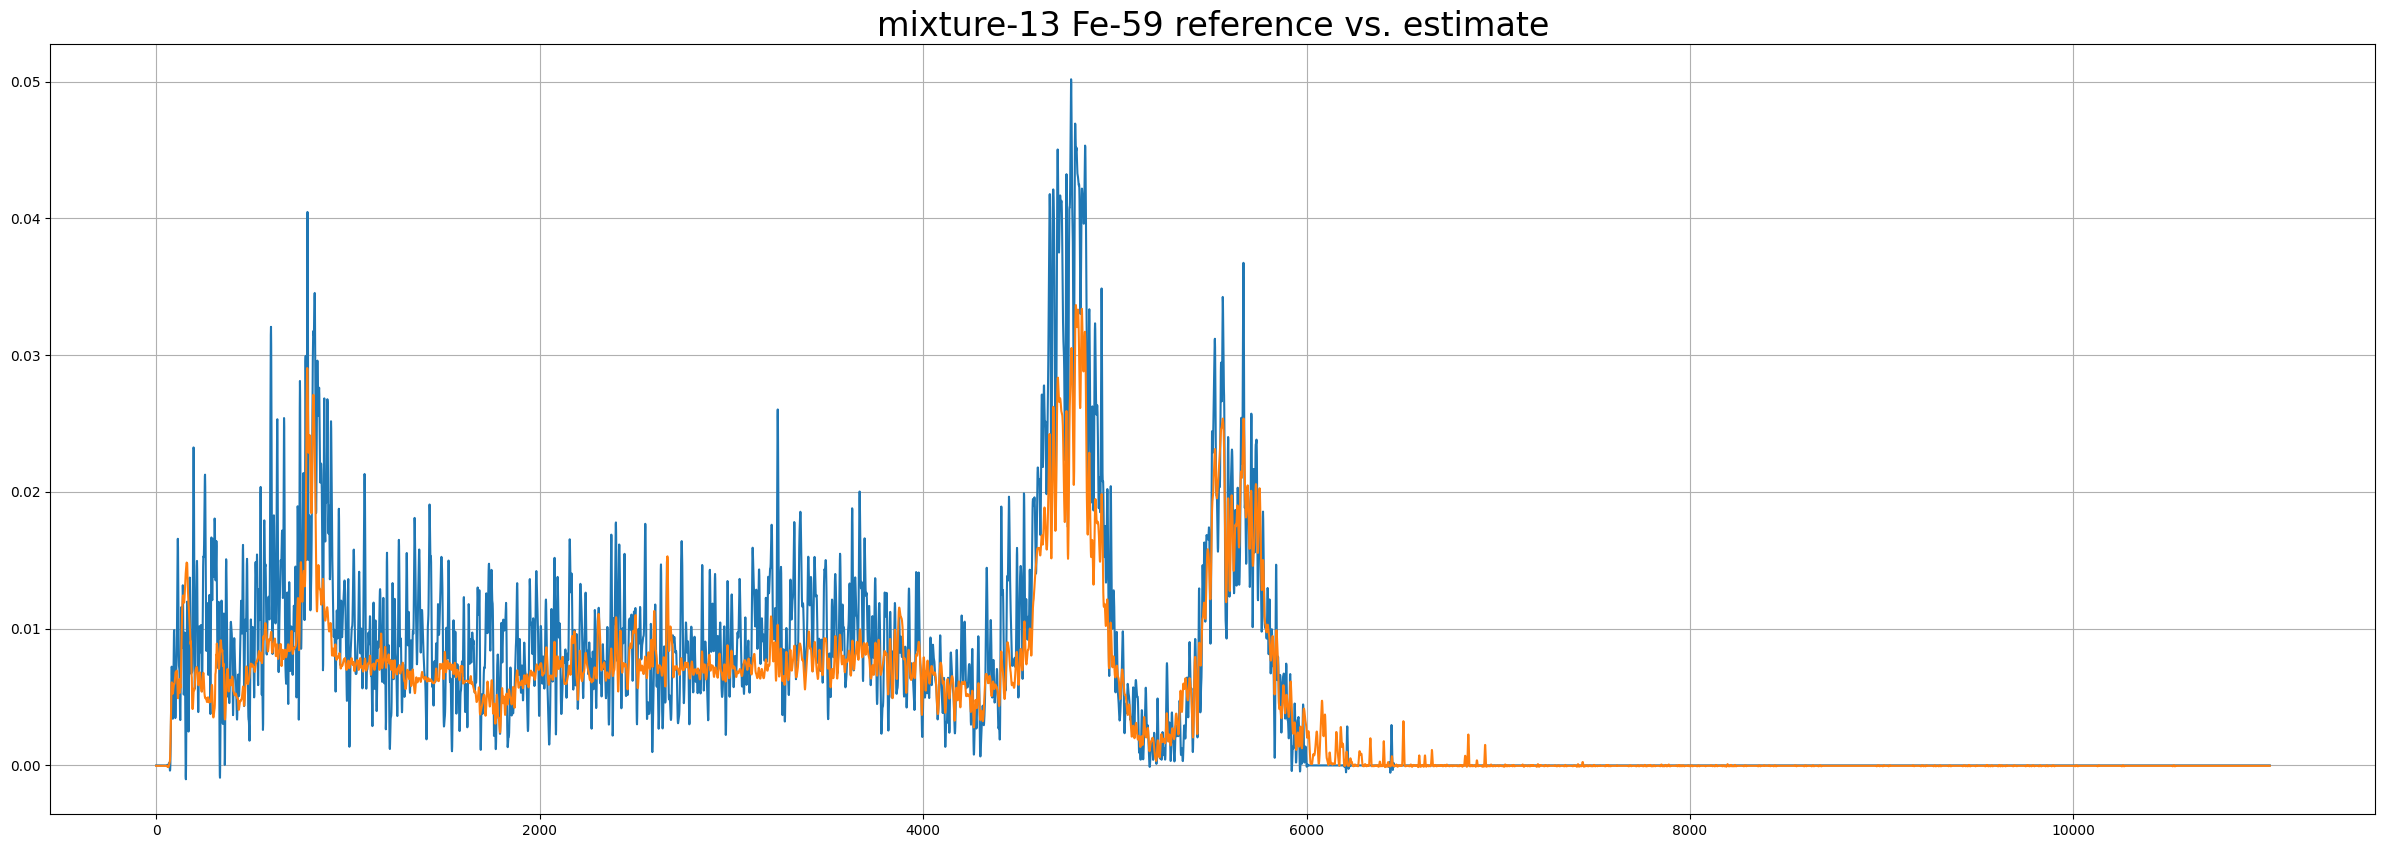

/home/aarbuzov/work-and-study/git/Wave-U-Net-Pytorch/audio_examples/musdb18hq_geant4_2_classes_Fe59_test_n=629/mixture-14/mixture.wav_Fe-59.wav


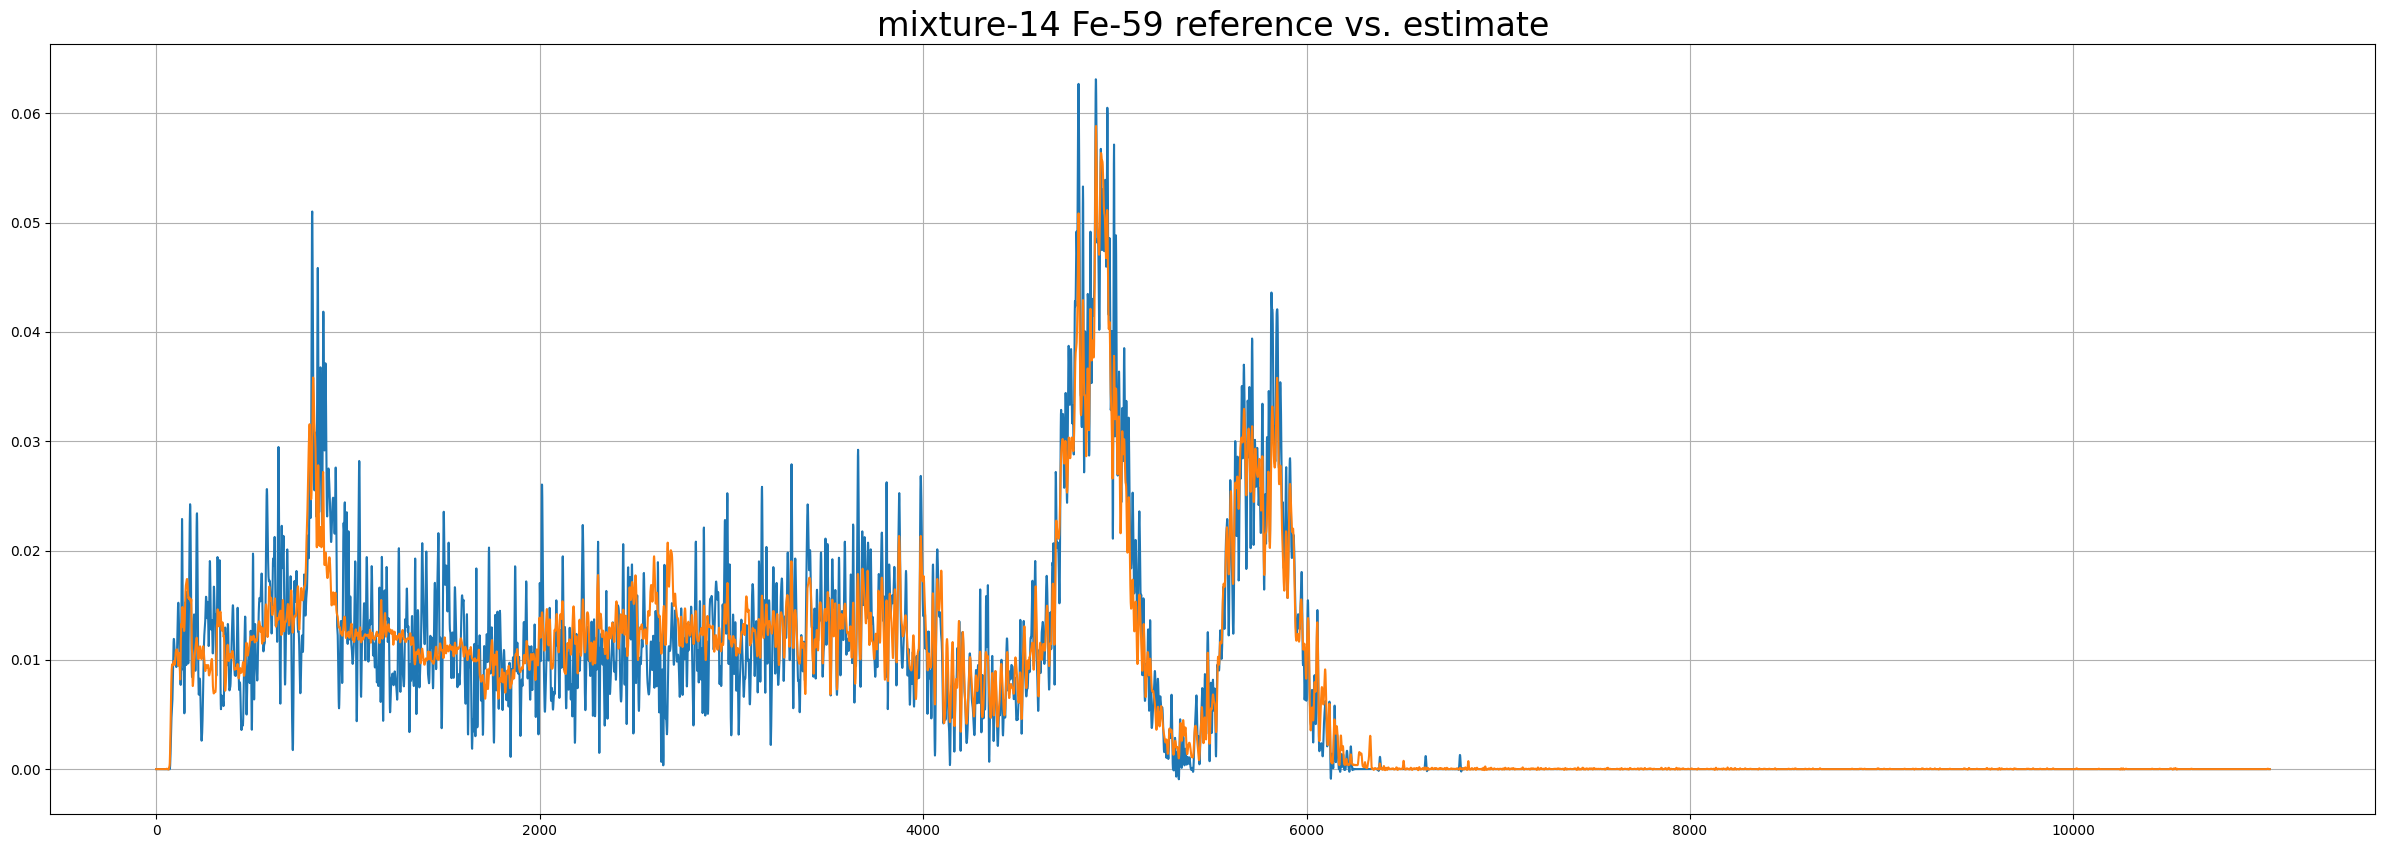

/home/aarbuzov/work-and-study/git/Wave-U-Net-Pytorch/audio_examples/musdb18hq_geant4_2_classes_Fe59_test_n=629/mixture-15/mixture.wav_Fe-59.wav


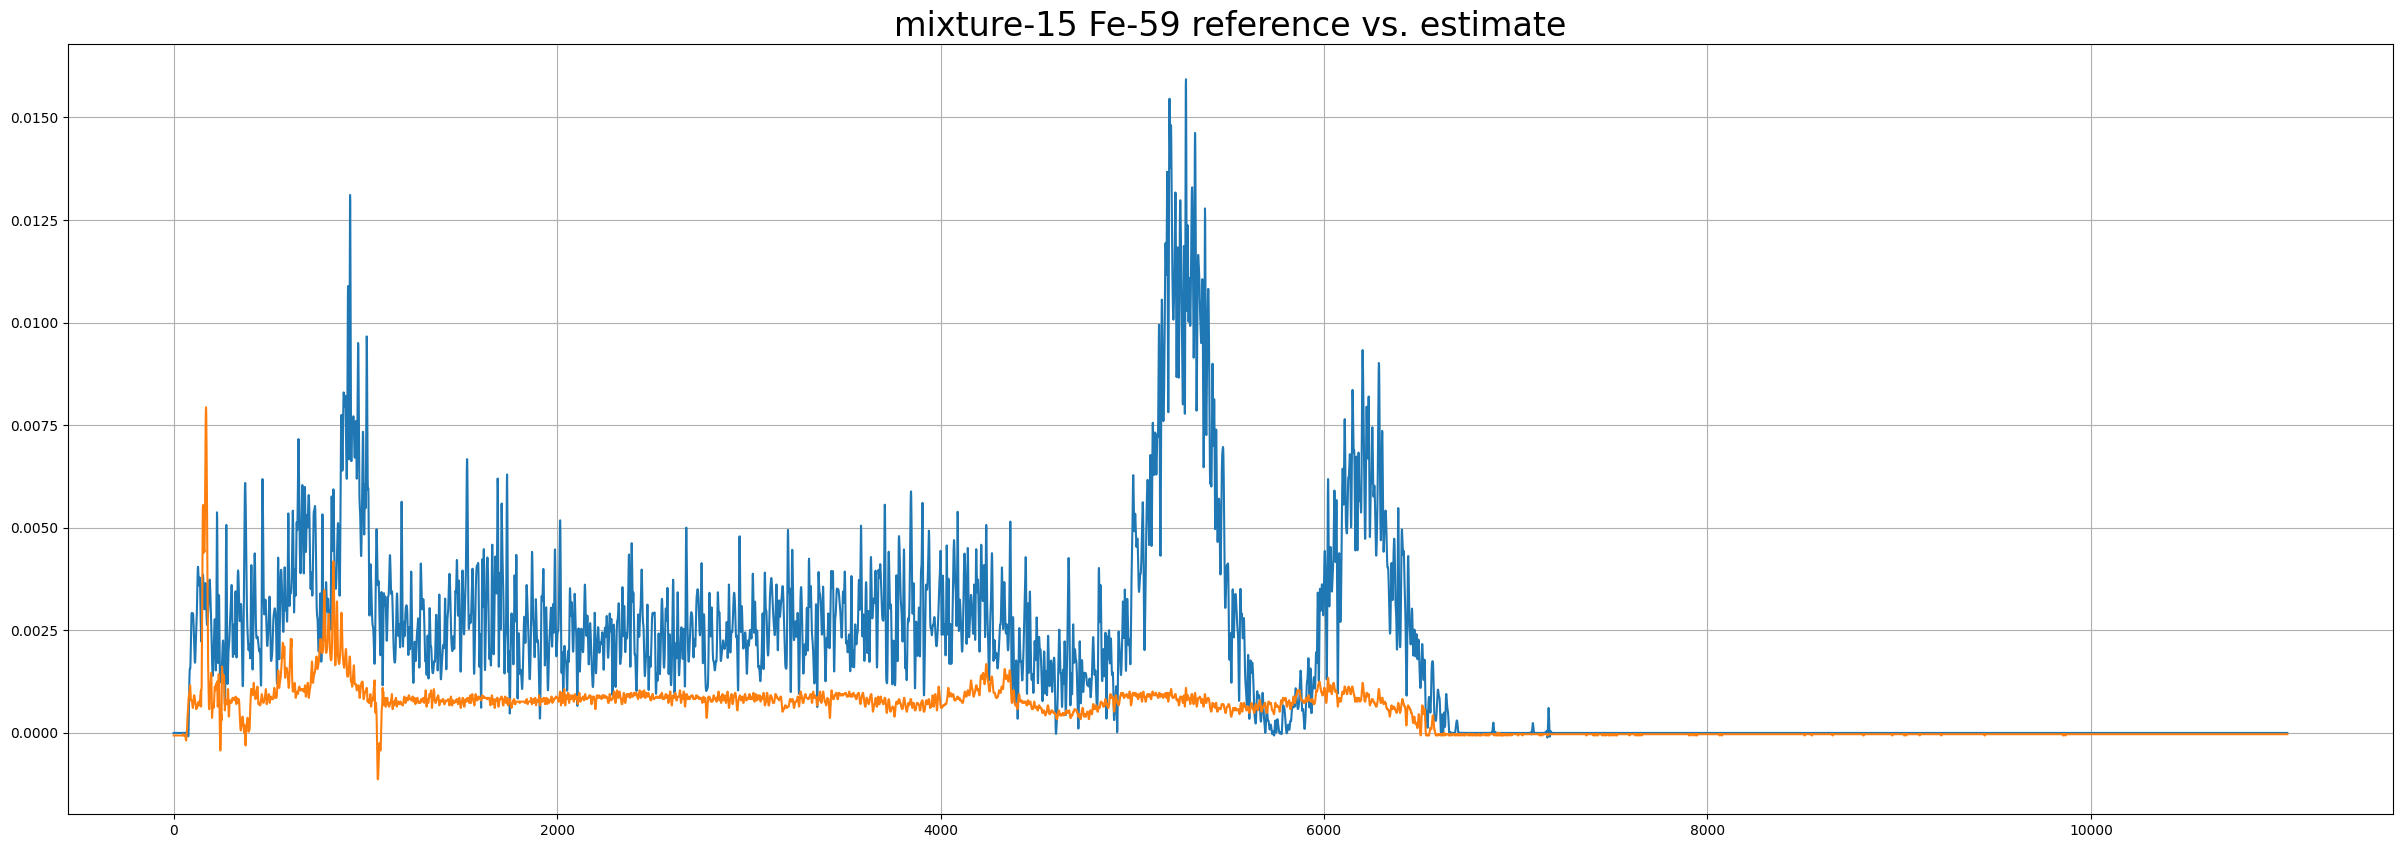

/home/aarbuzov/work-and-study/git/Wave-U-Net-Pytorch/audio_examples/musdb18hq_geant4_2_classes_Fe59_test_n=629/mixture-16/mixture.wav_Fe-59.wav


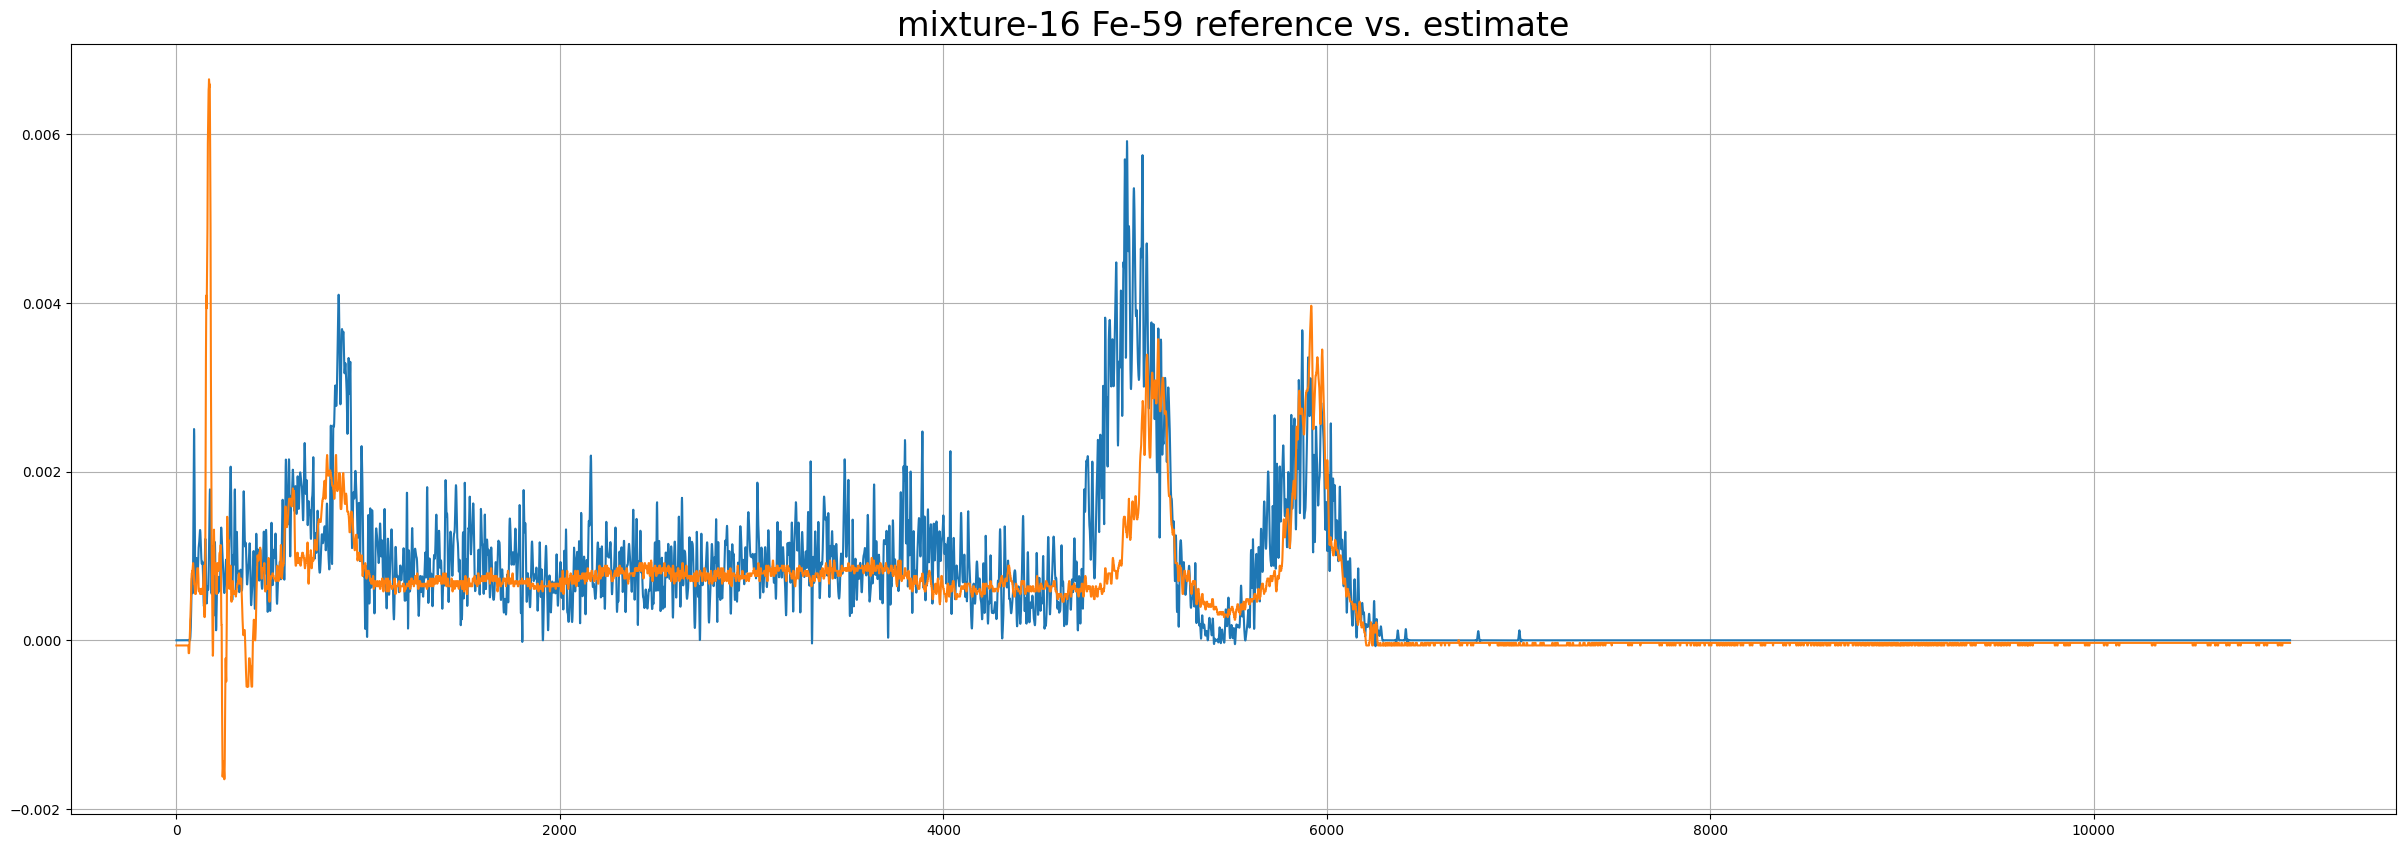

/home/aarbuzov/work-and-study/git/Wave-U-Net-Pytorch/audio_examples/musdb18hq_geant4_2_classes_Fe59_test_n=629/mixture-17/mixture.wav_Fe-59.wav


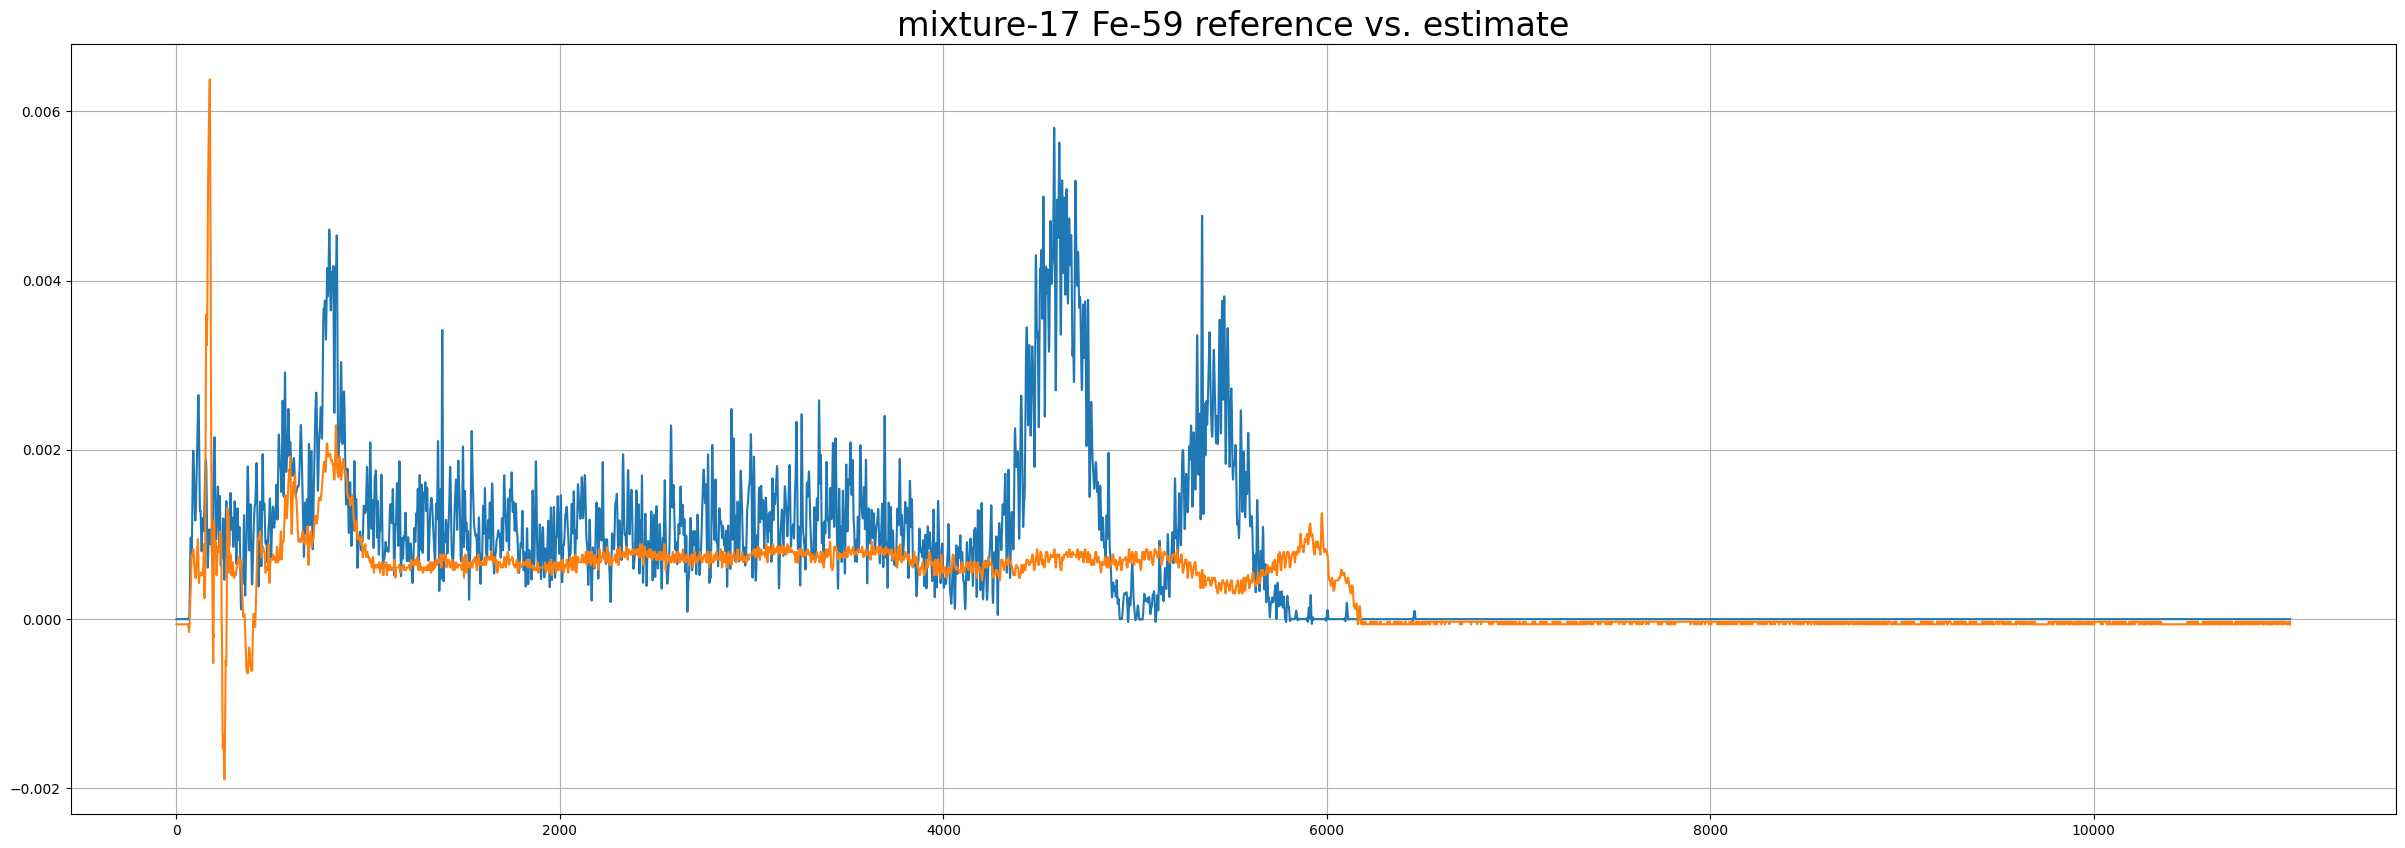

/home/aarbuzov/work-and-study/git/Wave-U-Net-Pytorch/audio_examples/musdb18hq_geant4_2_classes_Fe59_test_n=629/mixture-18/mixture.wav_Fe-59.wav


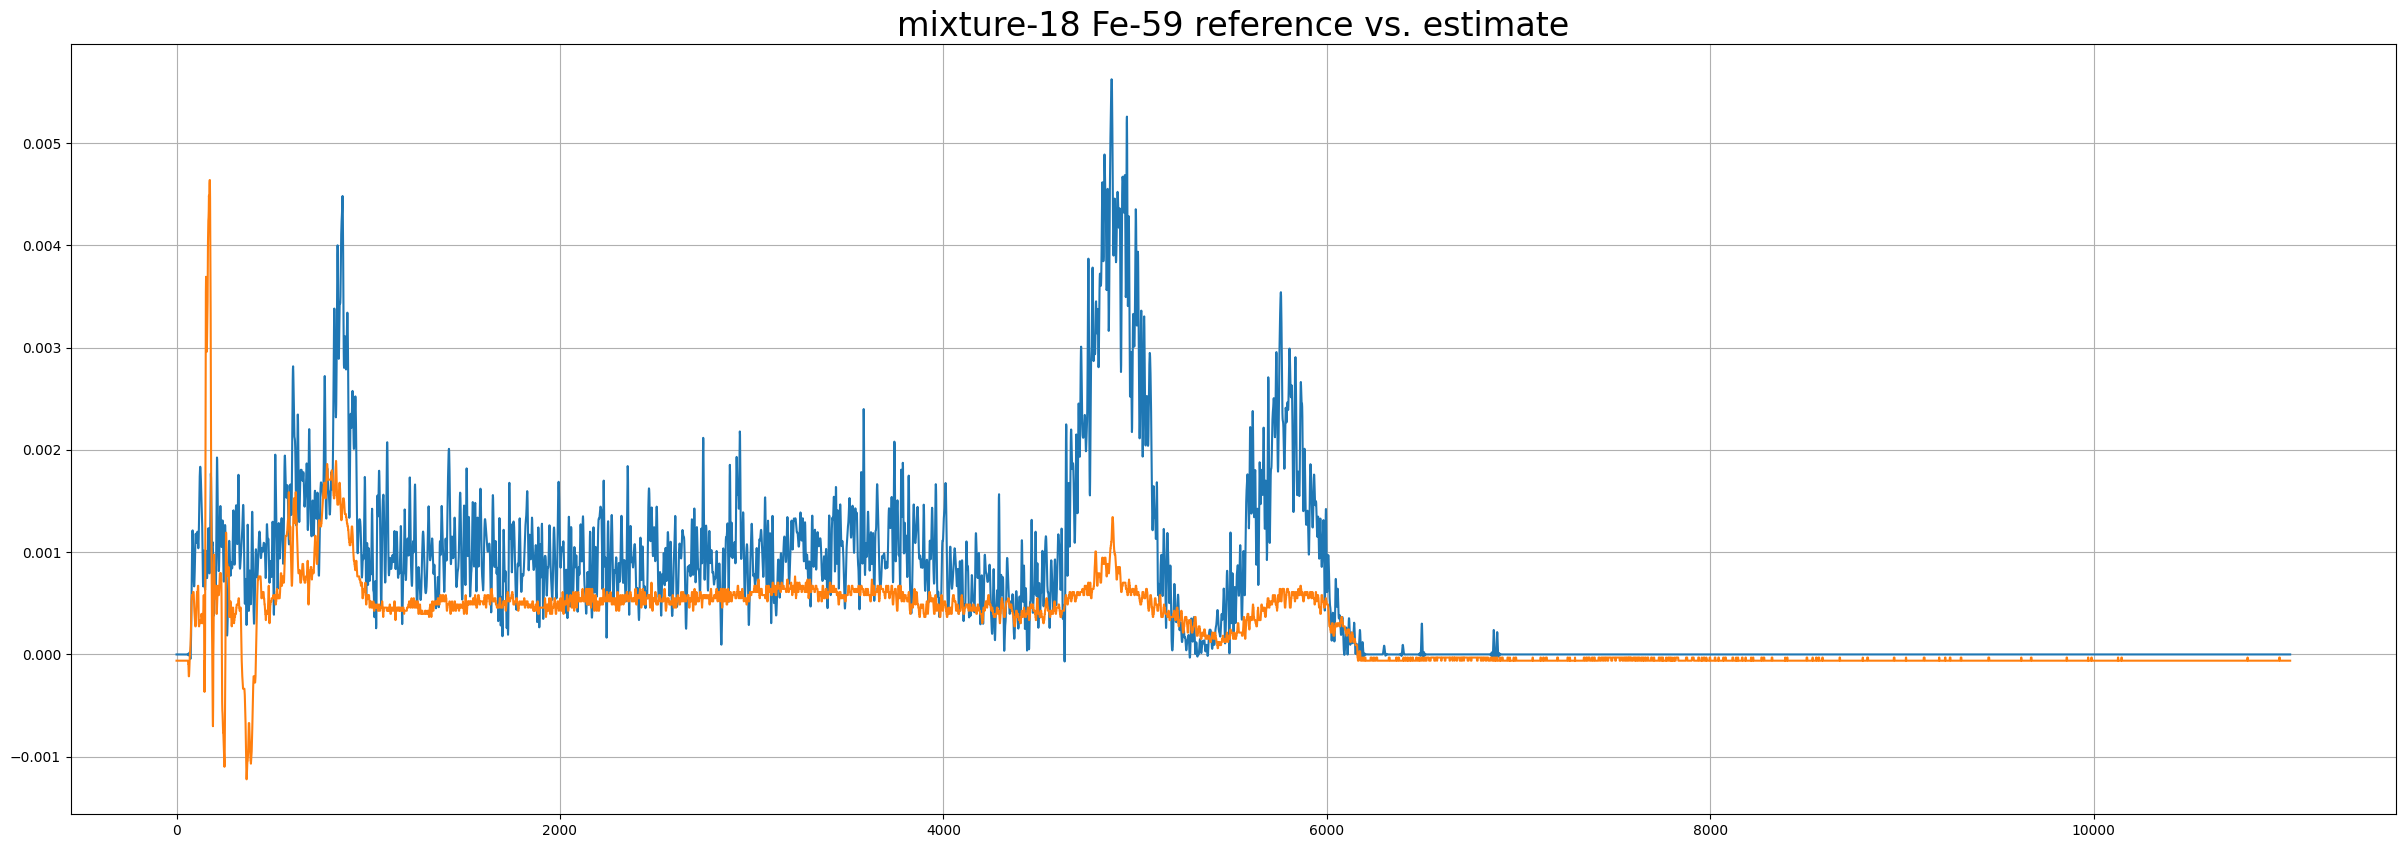

/home/aarbuzov/work-and-study/git/Wave-U-Net-Pytorch/audio_examples/musdb18hq_geant4_2_classes_Fe59_test_n=629/mixture-19/mixture.wav_Fe-59.wav


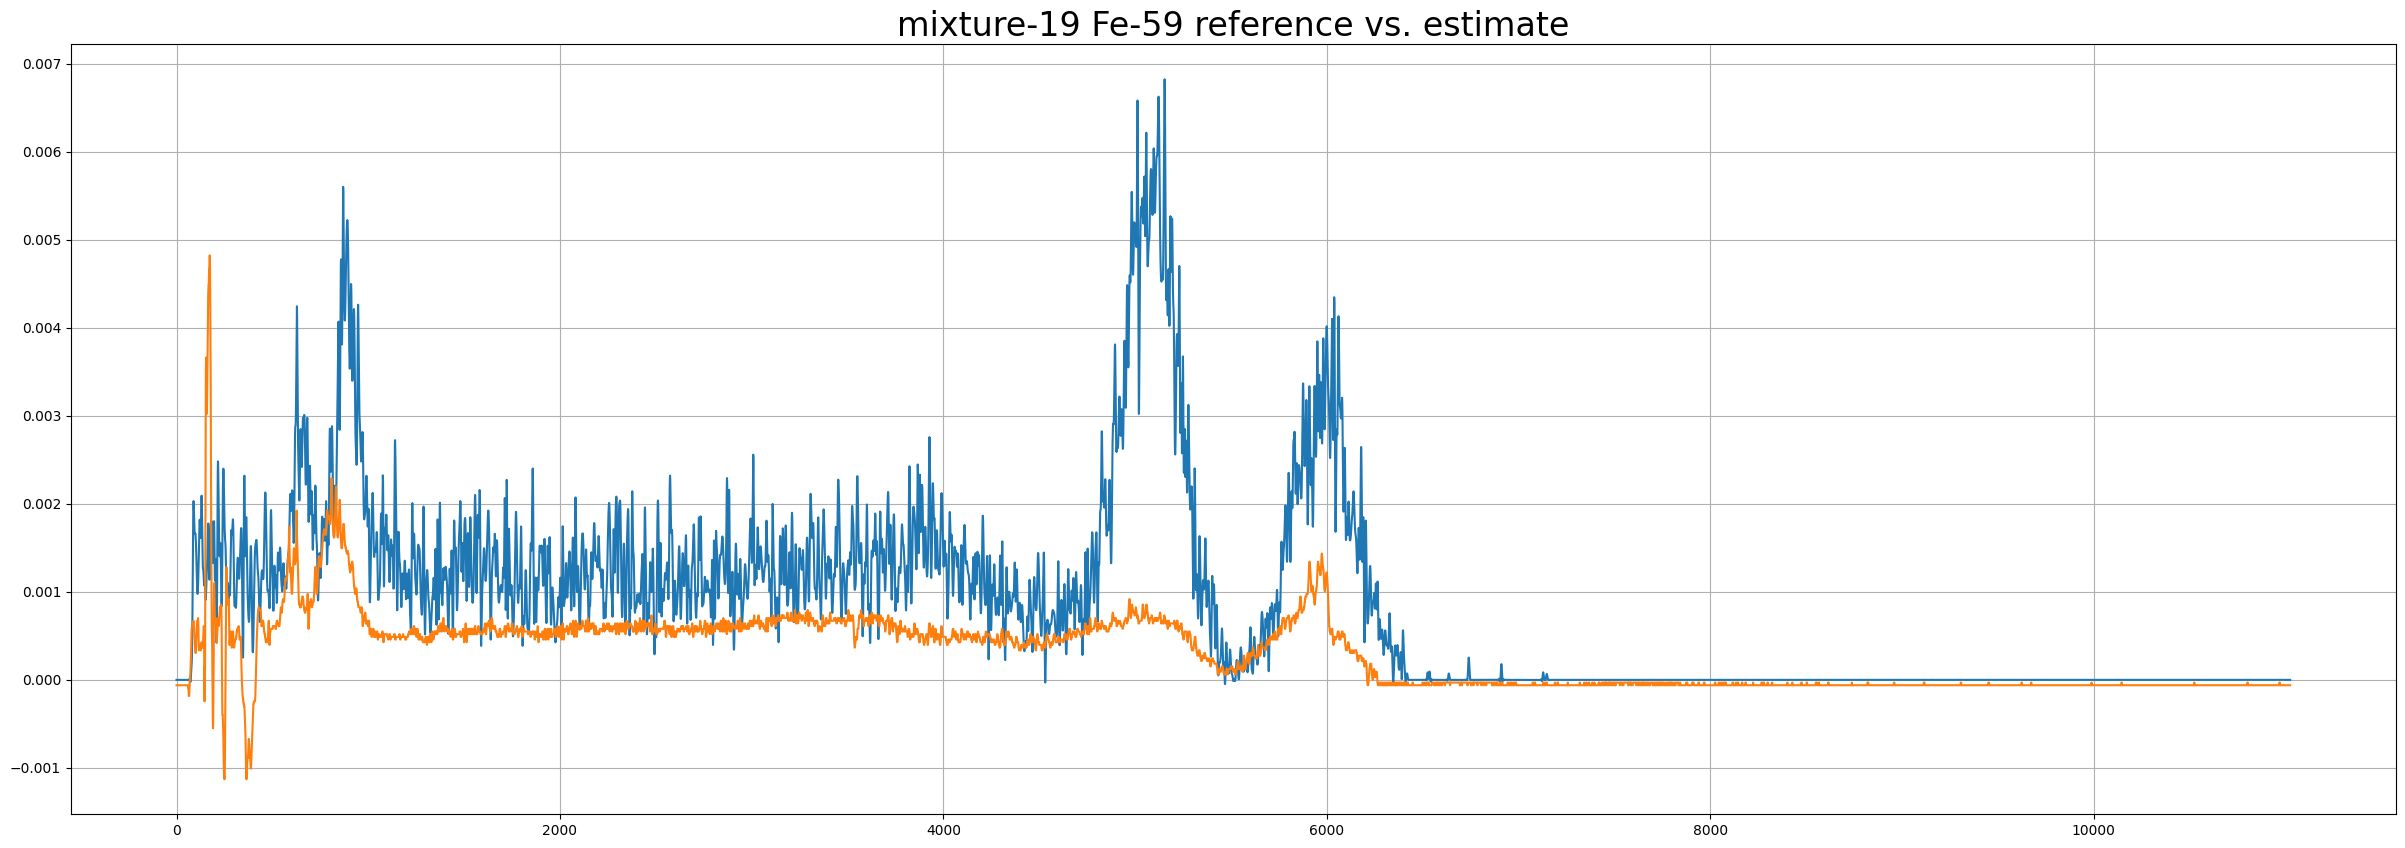

/home/aarbuzov/work-and-study/git/Wave-U-Net-Pytorch/audio_examples/musdb18hq_geant4_2_classes_Fe59_test_n=629/mixture-2/mixture.wav_Fe-59.wav


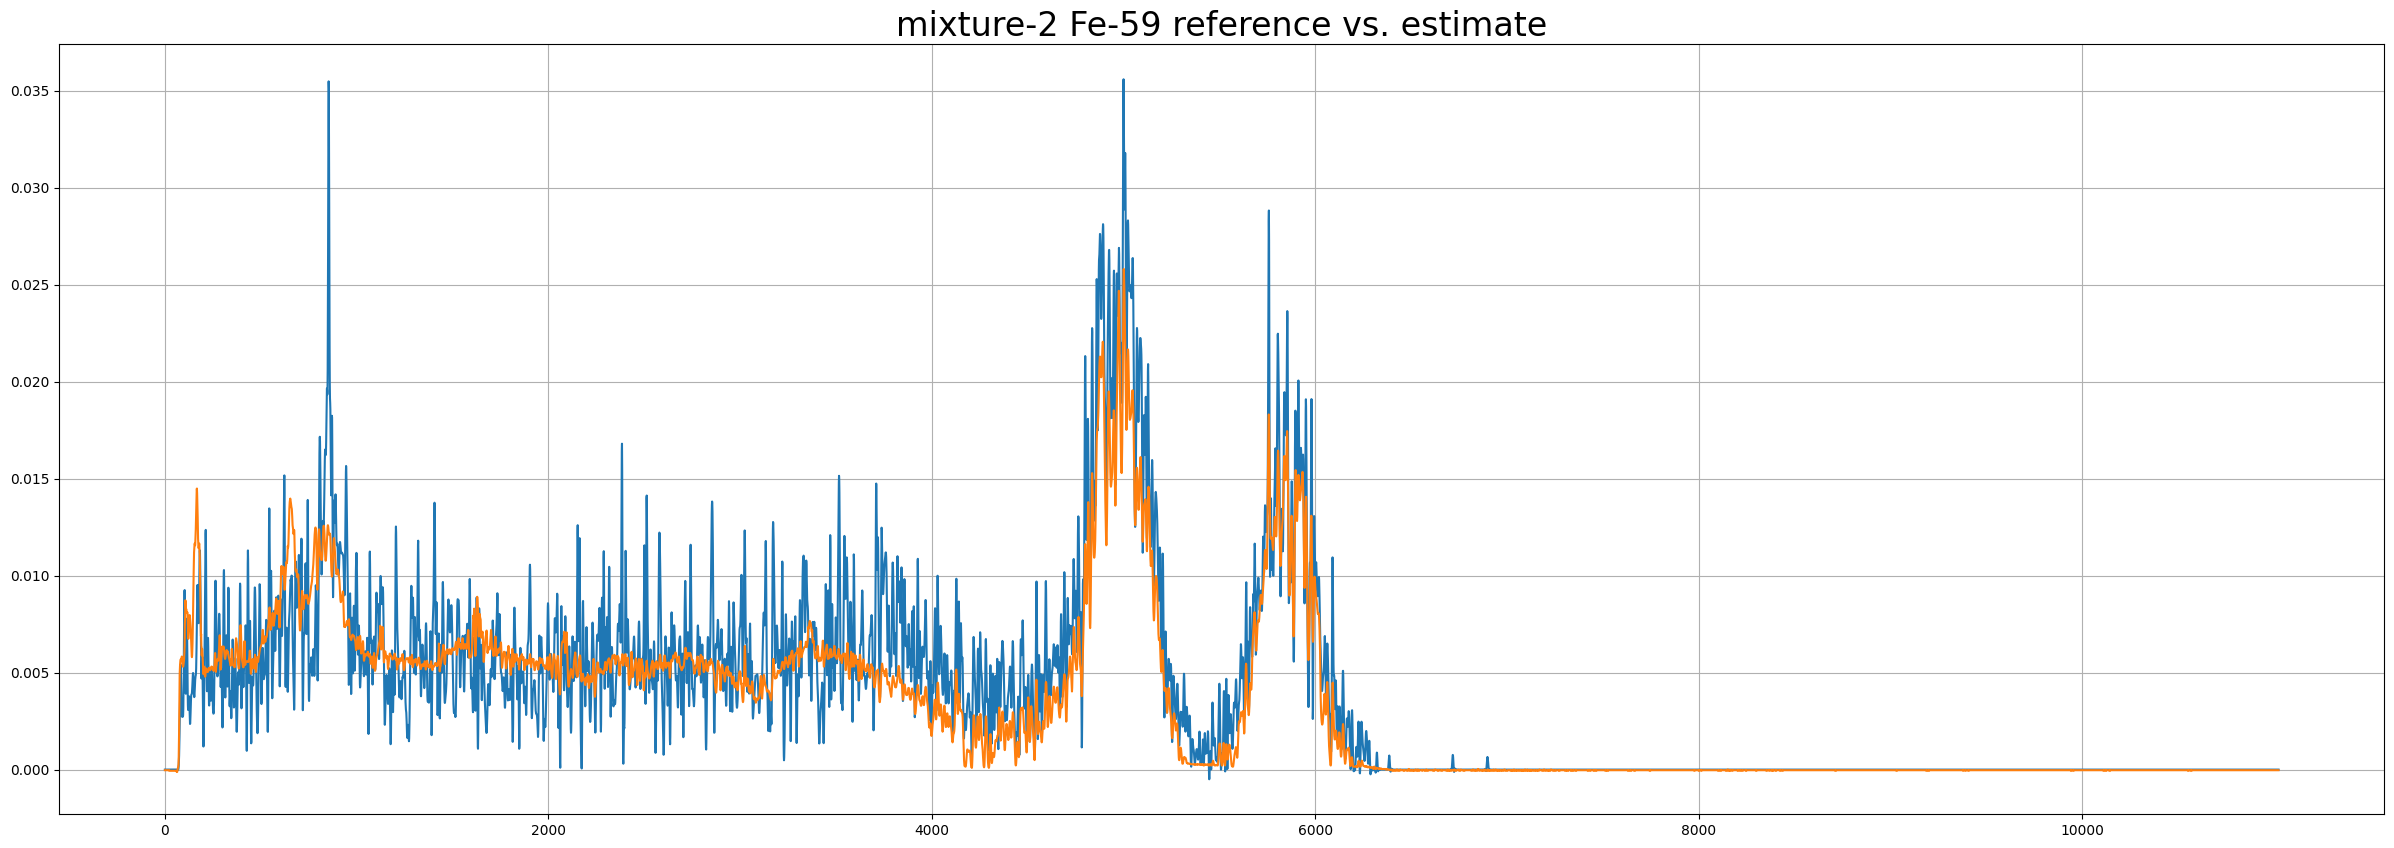

/home/aarbuzov/work-and-study/git/Wave-U-Net-Pytorch/audio_examples/musdb18hq_geant4_2_classes_Fe59_test_n=629/mixture-20/mixture.wav_Fe-59.wav


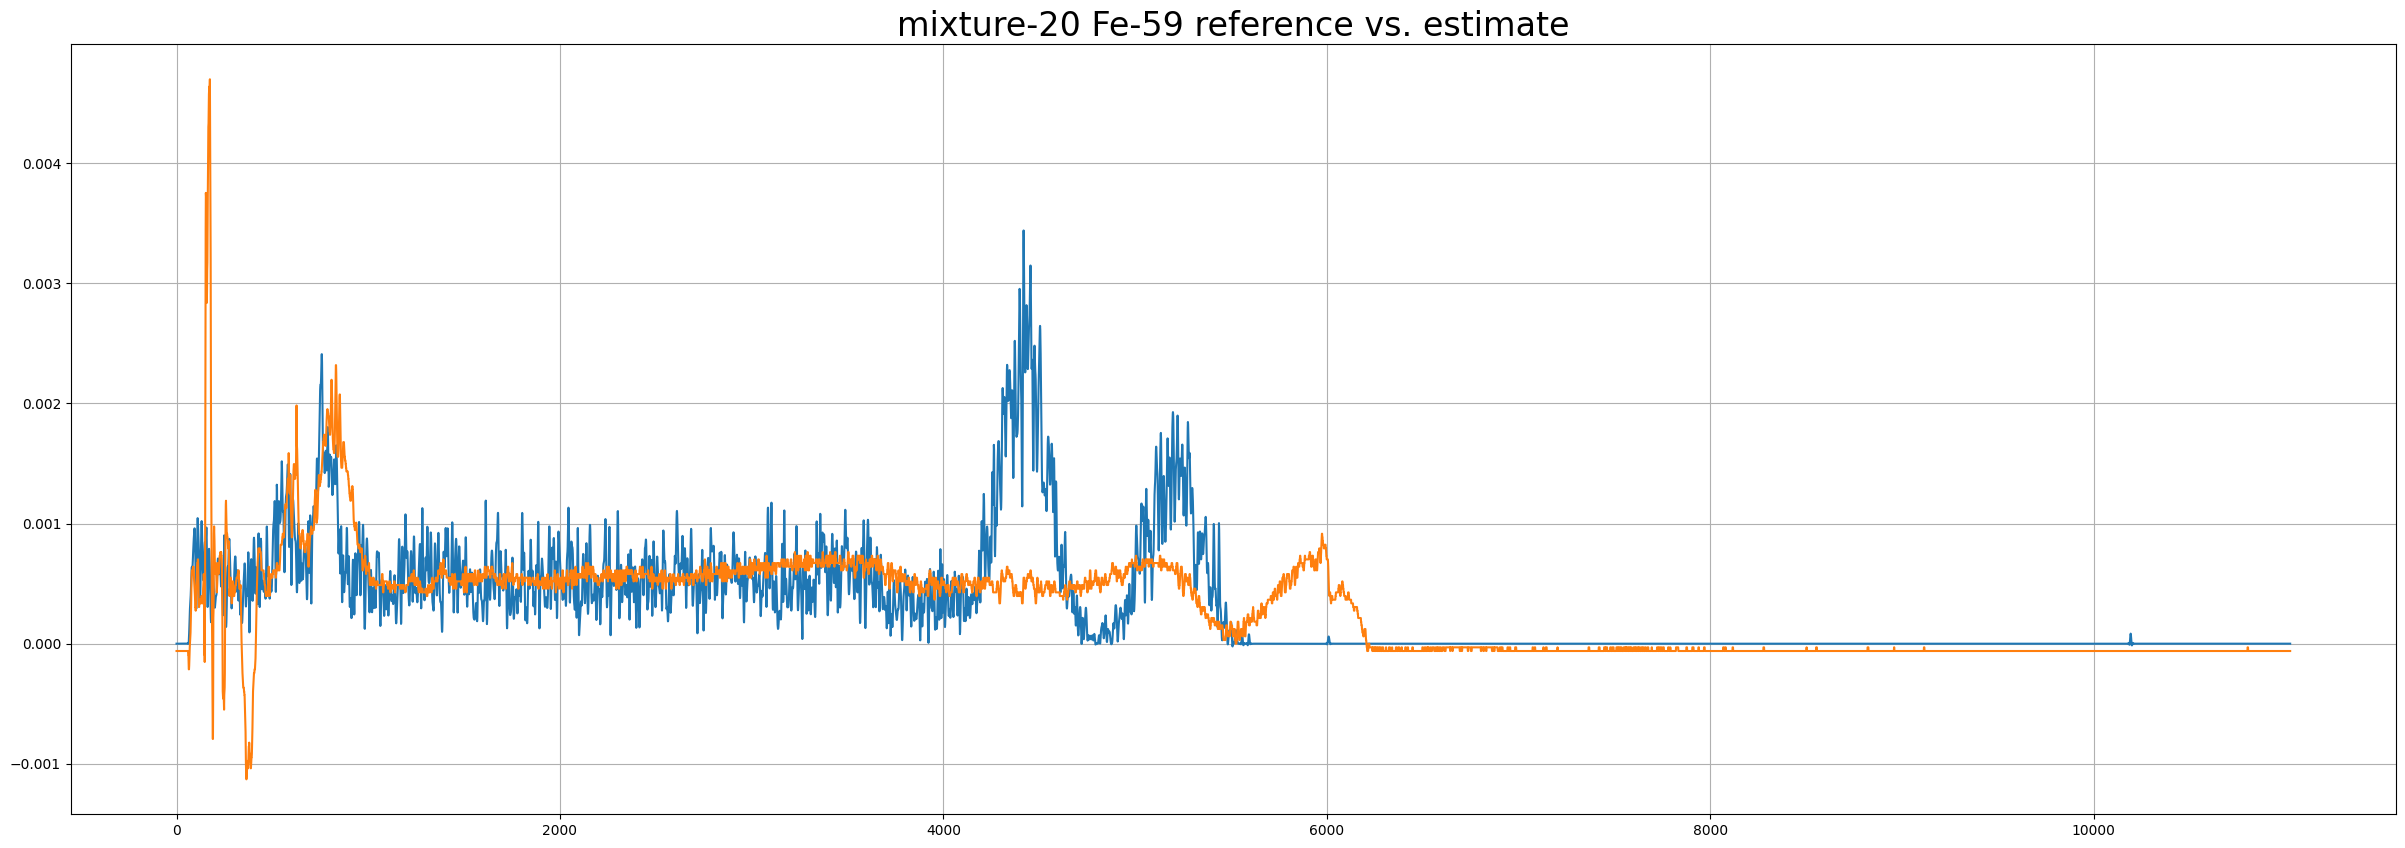

/home/aarbuzov/work-and-study/git/Wave-U-Net-Pytorch/audio_examples/musdb18hq_geant4_2_classes_Fe59_test_n=629/mixture-21/mixture.wav_Fe-59.wav


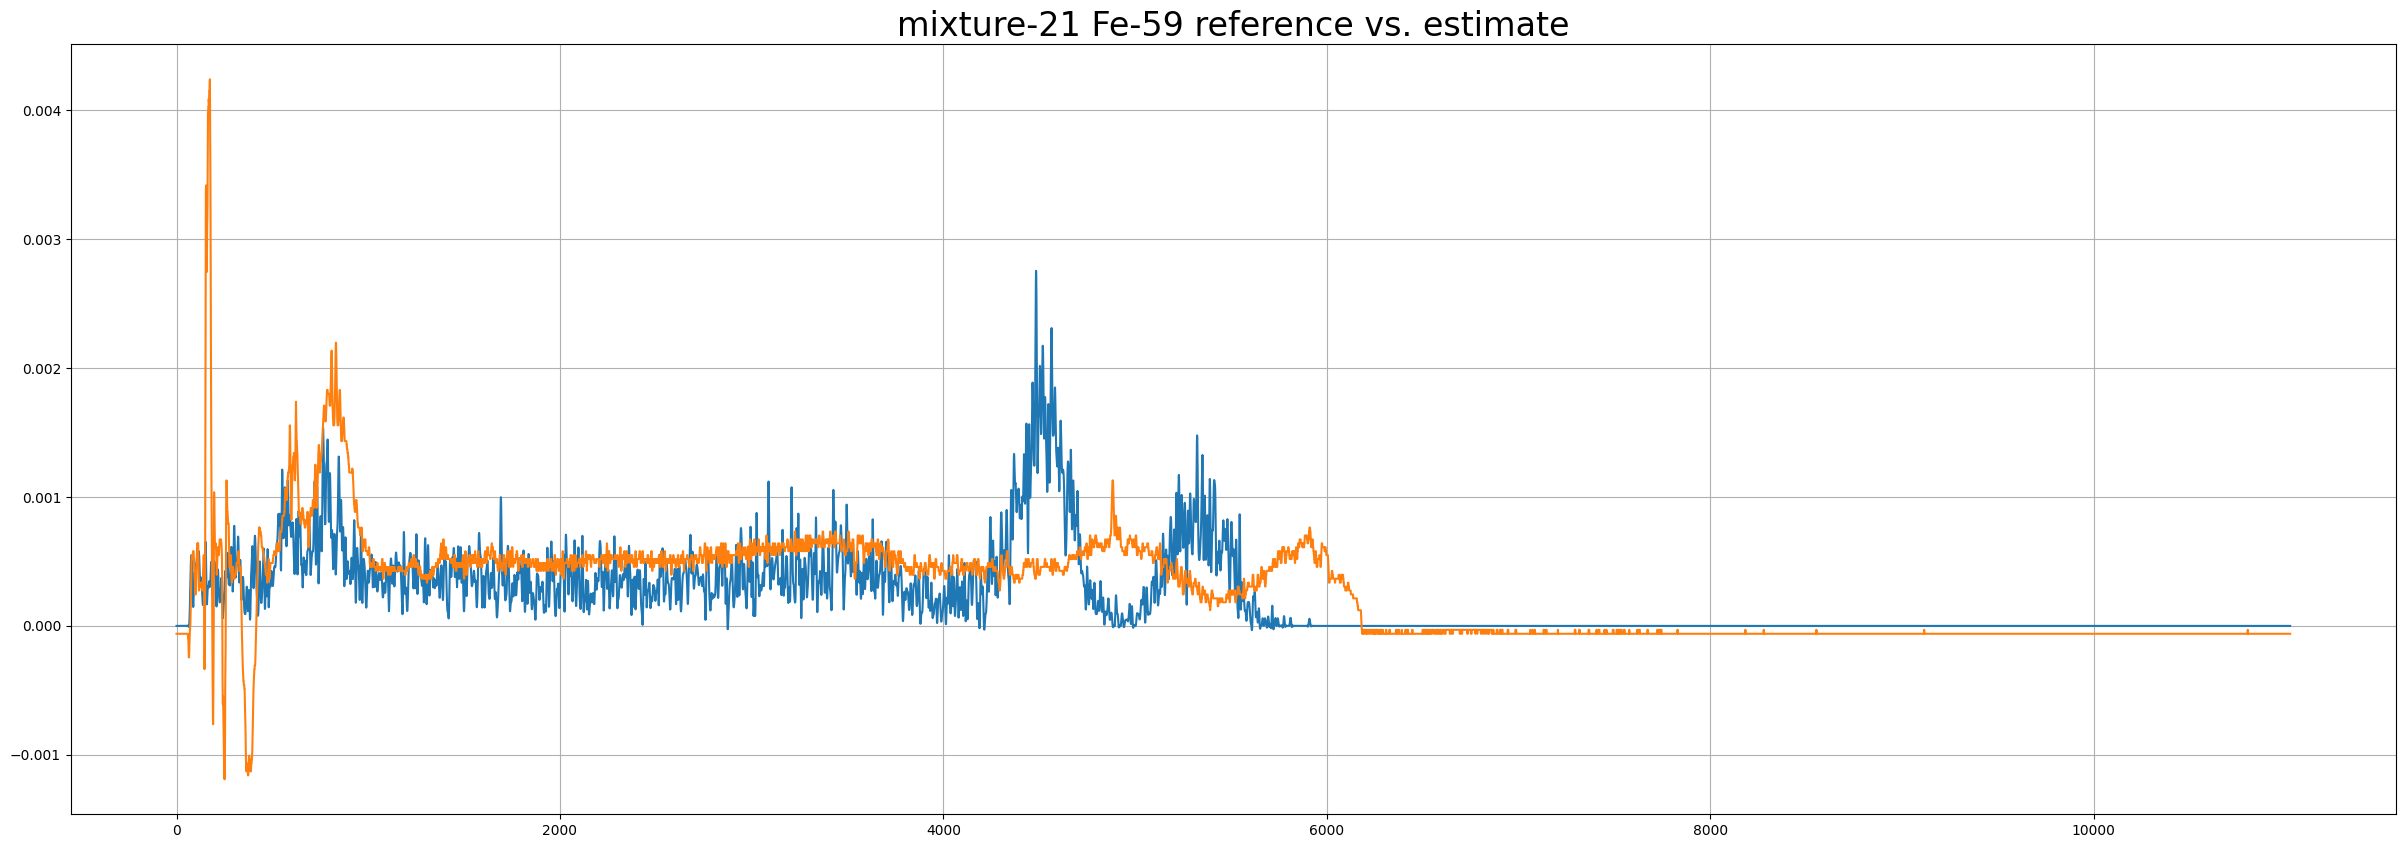

/home/aarbuzov/work-and-study/git/Wave-U-Net-Pytorch/audio_examples/musdb18hq_geant4_2_classes_Fe59_test_n=629/mixture-22/mixture.wav_Fe-59.wav


In [ ]:
args_input = "/home/aarbuzov/work-and-study/git/Wave-U-Net-Pytorch/audio_examples/musdb18hq_geant4_2_classes_Fe59_test_n=629/"

nuclide = 'Fe-59'
walker = sorted(str(p) for p in Path(args_input).rglob(f"*/{nuclide}.wav"))
sdrs = []
for file_name in walker:
    reference, samplerate = sf.read(file_name)
    bins = np.arange(reference.shape[0])
    spectrum_reference = reference.reshape((1,reference.shape[0]))

    print(file_name.replace(f"/{nuclide}.wav",f"/mixture.wav_{nuclide}.wav"))     
    estimate, samplerate = sf.read(file_name.replace(f"/{nuclide}.wav",f"/mixture.wav_{nuclide}.wav"))
    spectrum_estimate = estimate.reshape((1,estimate.shape[0]))
    
    sdr_val,_,_,_,_, = museval.metrics.bss_eval(reference, estimate)
    sdrs.append(sdr_val[0][0])
    
    fig, (ax) = plt.subplots(nrows=1, figsize=(30, 10), sharex=True)
    ax.plot(bins, reference)
    ax.plot(bins, estimate)
    ax.set_title(f"{file_name.split('/')[-2]} Fe-59 reference vs. estimate", size =24)
    ax.grid(True)
    plt.show()